## 5.2.3 KNN综合实践

&emsp;&emsp;**例5-2-1** 一个随机生成的数据集进行KNN算法的应用示例。

#### （1）导入库
<br>
&emsp;&emsp;sklearn.datasets.samples_generator用于生成样本数据，matplotlib用于可视化图表，sklearn.neighbors用于分类。
<br>
&emsp;&emsp;语句plt.rcParams\['axes.unicode_minus']=False，设置负号不使用Unicode编码。

In [ ]:
#（1）导入库
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
plt.rcParams['axes.unicode_minus']=False

#### （2）生成样本数据并展示
<br>
&emsp;&emsp;语句X,Y=make_blobs(n_samples=100,random_state=0,cluster_std=0.6)，利用scikit-learn的make_blobs函数生成数量为100个，固定随机数种子为0，标准差为0.6的样本数据集，并将生成的样本返回给X变量，标签返回给Y变量。
<br>
&emsp;&emsp;make_blobs函数原型如下：
<br>

&emsp;&emsp;**make_blobs(n_samples=100,random_state=None,cluster_std=0.6,centers=None,n_features=2, …)。**

- n_samples指定样本数量；
- random_state指定随机生成器的种子，保证程序每次运行的训练集和测试集相同；
- cluster_std：指定数据集的标准差；
- centers指定样本集的中心数量；
- n_features指定样本特征数量；

&emsp;&emsp;语句plt.figure(figsize=(16,10),dpi=144)，创建画布，设置图形的大小为16\*10英寸，设置图形每英寸的点数为144个。
<br>
&emsp;&emsp;语句plt.scatter(X\[:,0],X\[:,1],c=Y,s=100)，以X数据集的第0列和第1列数据作为两个维度，绘制散点图，设置数据点颜色根据数据标签确定，标记大小为100。

In [ ]:
#（2）利用scikit-learn的make_blobs函数生成100个样本点数据，并利用散点图显示
X,Y=make_blobs(n_samples=100,random_state=0,cluster_std=0.6,centers=8)
plt.figure(figsize=(16,10),dpi=144)
plt.scatter(X[:,0],X[:,1],c=Y,s=100)

#### （3）分类训练
<br>
&emsp;&emsp;调用scikit-learn中的KneighborsClassifier分类算法对样本数据点构建分类模型。其中最邻点数量选择10，并使用fit()函数训练模型。

In [17]:
#（3）调用scikit-learn中的KneighborsClassifier分类算法对样本数据点构建分类模型。
k=10
clf=KNeighborsClassifier(n_neighbors=k)
clf.fit(X,Y)

KNeighborsClassifier(n_neighbors=10)

#### （4）预测类别
<br>
&emsp;&emsp;对未知类别的样本数据点\[0,2]调用predict函数预测其类别并赋值给Y_sample，输出训练模型对未知数据点\[0,2]的预测结果是：
<br>
&emsp;&emsp;[2]
<br>
&emsp;&emsp;语句Y_sample=clf.predict(X_sample)调用predict函数预测样本数据点\[0,2]的类别。
<br>
&emsp;&emsp;语句neighbors=clf.kneighbors(X_sample, return_distance=False)，返回样本数据点的相邻点的索引值的集合，不返回距离。

In [18]:
#（4）对未知类别的样本数据点[0,2]调用predict函数预测其类别。
X_sample=np.array([[0,2]])
Y_sample=clf.predict(X_sample)
neighbors=clf.kneighbors(X_sample, return_distance=False)
print(Y_sample)

[2]


#### （5）展示10个最邻近点直线显示图
<br>
&emsp;&emsp;为了更直观显示样本点数据的类型，将10个最邻近点与样本数据点\[0,2]用直线连接起来，从图5-2-4很直观地可以看出样本数据点的类别。
<br>
&emsp;&emsp;语句plt.scatter(X_sample\[:,0],X_sample\[:,1],marker="x",c=Y_sample,s=100)，画出样本点，参数marker="x"表示样本数据点用符号‘x’表示。
<br>
&emsp;&emsp;语句for i in neighbors\[0]依次遍历10个最邻近点，执行plt.plot(\[X\[i]\[0],X_sample\[0]\[0]],…)语句，画出从样本数据点到每个最邻近点的连线，使用黑色破折线连接数据点和最近邻点，线宽为0.6。

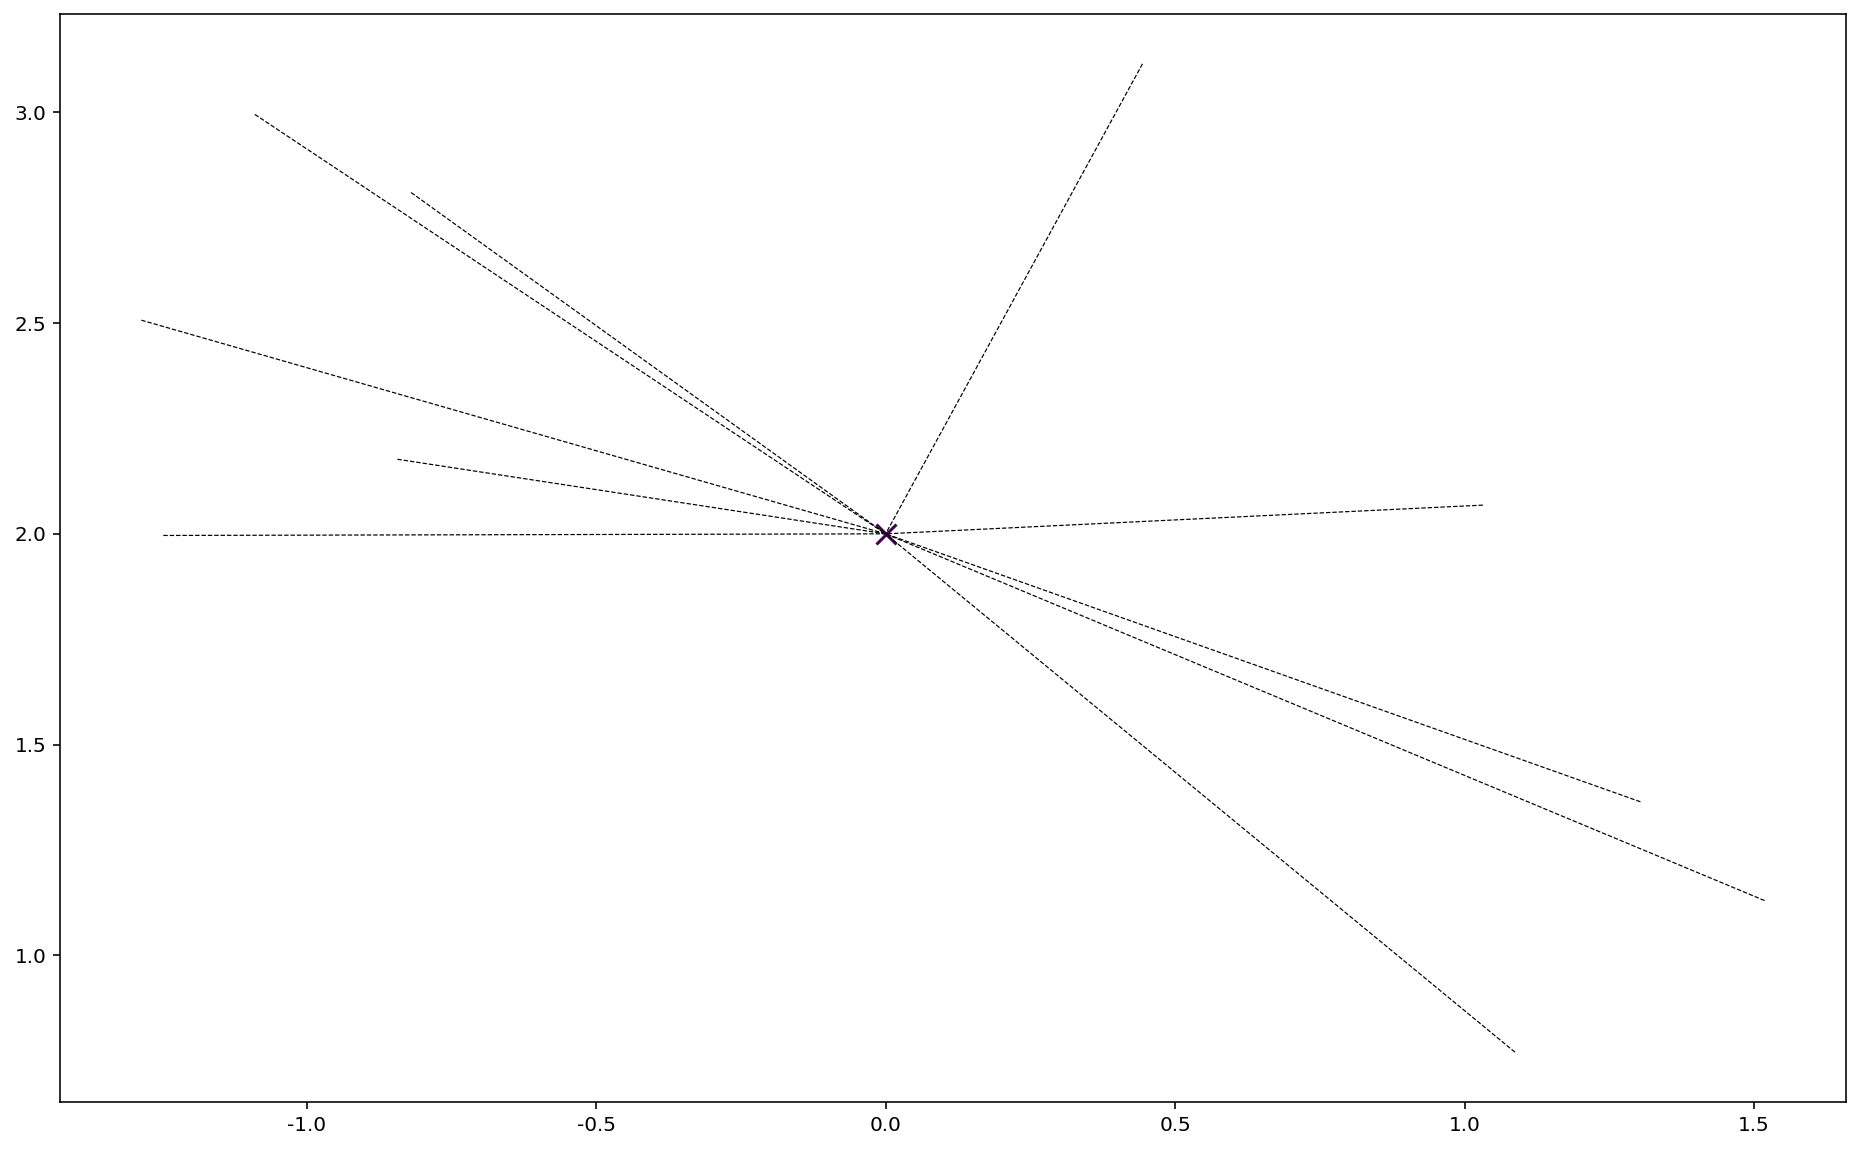

In [22]:
#（5）利用直线表示出与数据点[0,2]距离最近的10个点，根据图形很容易判断出该数据点所属的类别。
plt.figure(figsize=(16,10),dpi=144)
#plt.scatter(X[:,0],X[:,1],c=Y,s=100)
plt.scatter(X_sample[:,0],X_sample[:,1],marker="x",c=Y_sample,s=100)
for i in neighbors[0]:
    plt.plot([X[i][0],X_sample[0][0]],[X[i][1],X_sample[0][1]],'k--',linewidth=0.6)
plt.show()

&emsp;&emsp;**例5-2-2** 针对鸢尾花数据集，基于KNN算法进行分类，并显示相关分类性能指标。

#### （1）导入库
&emsp;&emsp;从sklearn.datasets 导入 iris数据加载器；从sklearn.model_selection导入train_test_split函数，用以切分训练集和测试集；从sklearn.preprocessing导入StandardScaler类，用以进行数据标准化；从sklearn.neighbors导入KNeighborsClassifier类，用于进行分类操作；从sklearn.metrics导入classification_report函数，用以对预测结果做更加详细的分析。

In [ ]:
# （1）导入库
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#### （2）利用load_iris读取鸢尾花数据集
&emsp;&emsp;使用加载器读取数据并且存入变量iris；并设置随机种子random_state=33，设置测试集比例test_size=0.25，使用train_test_split函数分割iris数据集及相应的数据标签集，产生75%的训练样本，25%的测试样本，并将切分后的训练样本返回给X_train变量，测试样本返回给X_test变量，训练标签返回给y_train变量，测试标签返回给y_test变量。

In [ ]:
# （2）利用load_iris读取鸢尾花数据集
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=33)

#### （3）标准化数据
&emsp;&emsp;语句ss = StandardScaler()，生成标准化实例。  
&emsp;&emsp;语句X_train = ss.fit_transform(X_train)和X_test = ss.transform(X_test)分别对训练集和测试集数据进行标准化，fit_transfrom()函数用于拟合数据，找到数据转换规则，并将数据标准化。transform()是将数据标准化，将测试集按照训练集同样的模型进行转换，得到特征向量。此时可以直接使用之前的fit_transfrom()函数生成的转换规则，若再次使用fit_transform()函数对测试集数据标准化会导致两次标准化后的数据格式不相同。

In [ ]:
# （3）标准化数据
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#### （4）测试与性能评估
&emsp;&emsp;利用K近邻分类器进行分类；使用fit()函数训练模型；使用predict()函数预测数据，预测结果储存在变量y_predict中。  
&emsp;&emsp;语句classification_report(y_test,y_predict,target_names=iris.target_names)，比较测试集和训练集的标签数据，计算并展示主要分类指标的文本报告，包括每个分类的精确度、召回率、F1值等信息。分类名使用iris数据集中的标签名。

In [ ]:
# （4）使用K近邻分类器对测试数据进行类别预测，预测结果储存在变量y_predict中。
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_predict = knc.predict(X_test)
# 测试与性能评估
print(classification_report(y_test,y_predict,target_names=iris.target_names))